In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
%matplotlib inline

In [28]:
df = pd.read_csv('gbm-data.csv')
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           14.84s
         2           0.9192           15.84s
         3           0.8272           14.83s
         4           0.7834           14.93s
         5           0.7109           14.70s
         6           0.6368           15.84s
         7           0.5797           17.67s
         8           0.5610           18.23s
         9           0.5185           22.88s
        10           0.4984           22.44s
        20           0.1999           17.47s
        30           0.1313           15.27s
        40           0.0790           13.68s
        50           0.0511           12.63s
        60           0.0352           12.34s
        70           0.0245           11.60s
        80           0.0162           10.98s
        90           0.0114           10.32s
       100           0.0077            9.68s
       200           0.0004            2.71s
      Iter       Train Loss   Remaining Time 
        

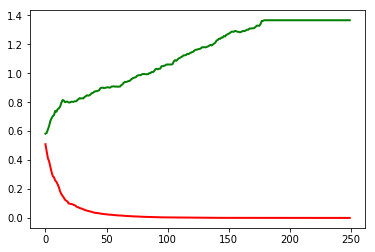

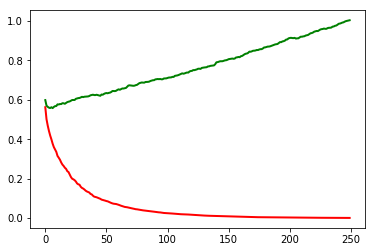

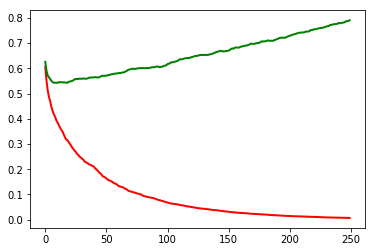

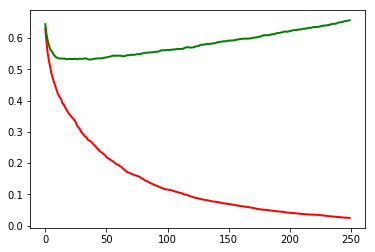

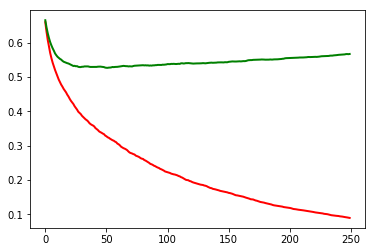

In [46]:
for n in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose = True, random_state=241,learning_rate=n)
    clf.fit(X_train, y_train)
    test_loss = []
    train_loss = []
    for i, y_pred in enumerate(clf.staged_decision_function(X_train)):
        y_pred_train = 1./(1.+np.exp(-y_pred))
        train_loss.append(log_loss(y_train, y_pred_train))
        
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        y_pred_test = 1./(1.+np.exp(-y_pred))
        test_loss.append(log_loss(y_test, y_pred_test))
    plt.figure()
    plt.plot(train_loss, 'r', linewidth = 2)
    plt.plot(test_loss, 'g' , linewidth = 2)

In [47]:
with open('answer4_5.txt', 'w') as fout:
    fout.write('overfitting')

In [52]:
for n in [0.2]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose = True, random_state=241,learning_rate=n)
    clf.fit(X_train, y_train)
    test_loss = []
    #train_loss = []
    #for i, y_pred in enumerate(clf.staged_decision_function(X_train)):
    #    y_pred_train = 1./(1.+np.exp(-y_pred))
    #    train_loss.append(log_loss(y_train, y_pred_train))      
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        print i
        y_pred_test = 1./(1.+np.exp(-y_pred))
        test_loss.append(log_loss(y_test, y_pred_test))

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.92s
         2           1.1715           13.85s
         3           1.1009           14.06s
         4           1.0529           14.48s
         5           1.0130           14.67s
         6           0.9740           14.93s
         7           0.9475           14.63s
         8           0.9197           14.77s
         9           0.8979           14.34s
        10           0.8730           14.09s
        20           0.7207           12.34s
        30           0.6055           12.23s
        40           0.5244           12.20s
        50           0.4501           11.73s
        60           0.3908           10.96s
        70           0.3372           10.16s
        80           0.3009            9.44s
        90           0.2603            8.95s
       100           0.2327            8.35s
       200           0.0835            2.73s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
2

In [53]:
test_loss.index(min(test_loss))+1

37

In [73]:
min(test_loss),2

(0.531094637596885, 2)

In [61]:
answer = str(0.53) + ' ' + str(37)

In [62]:
with open('answer4_6.txt', 'w') as fout:
    fout.write(answer)

In [63]:
rf = RandomForestClassifier(n_estimators=37, random_state=241)
rf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [71]:
round(log_loss(y_test, y_pred[:,1]),2)

0.66

In [72]:
with open('answer4_7.txt', 'w') as fout:
    fout.write('0.53')

In [69]:
y_pred[:,1]

array([0.9616252 , 0.14045766, 0.41060204, ..., 0.56442039, 0.05771769,
       0.99195541])